     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATI

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


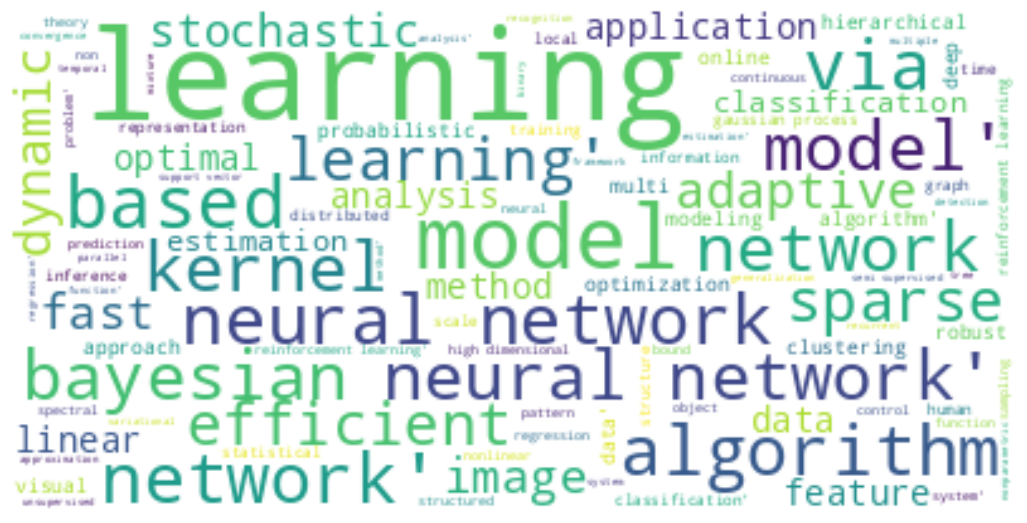

['self', 'organization', 'associative', 'database', 'application', 'self organization', 'organization associative', 'self organization associative', 'mean', 'field']


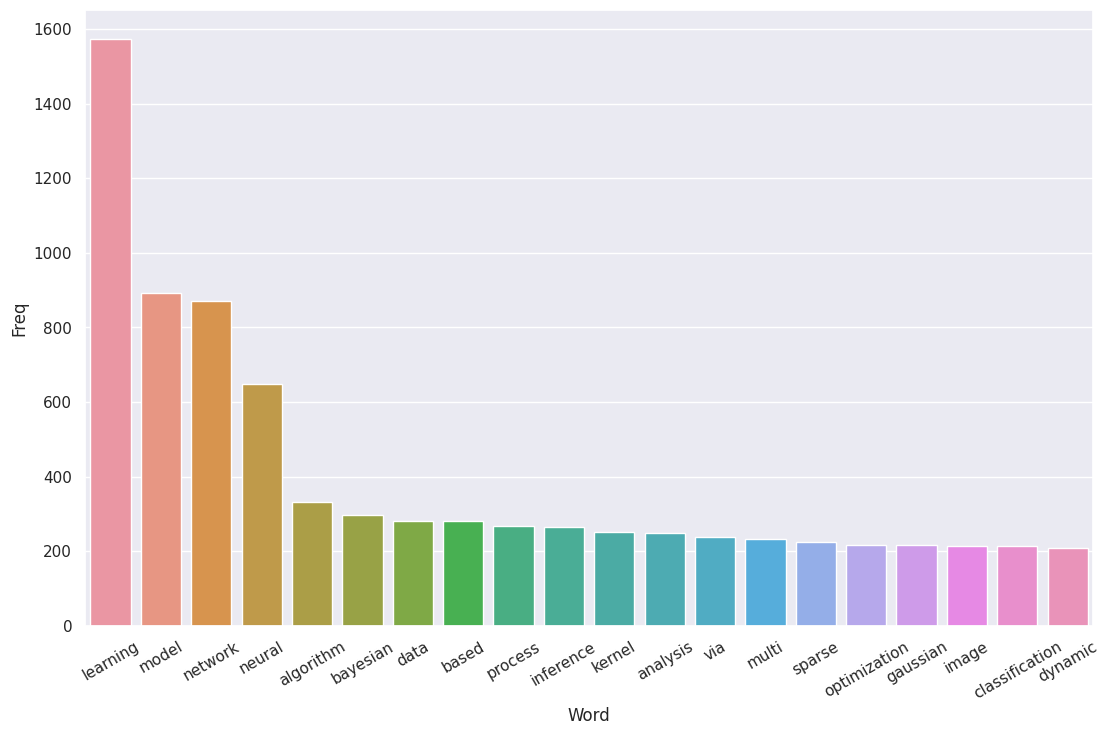


Abstract:
reinforcement learning algorithm partially observable environment short term memory

Keywords:
learning algorithm partially 0.272
partially observable environment 0.264
observable environment 0.264
algorithm partially observable 0.264
algorithm partially 0.264
Predicted Keywords: {'machine learning': 0.357, 'machine': 0.263, 'intelligence': 0.239, 'enable': 0.239, 'branch': 0.226, 'datasets': 0.213, 'natural language': 0.207}


In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.models import Word2Vec
import string
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# List all files under the input directory
input_directory = '/sample_data/'  # Make sure to provide the correct absolute path
for dirname, _, filenames in os.walk(input_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read the dataset from the CSV file
file_path = os.path.join(input_directory, 'papers.csv')
dataset = pd.read_csv("./sample_data/papers_key.csv")

# Display the first 5 rows of the dataset
print(dataset.head(5))

# Calculate the word count for each 'title' and add it as a new column 'word_count'
dataset['word_count'] = dataset['title'].apply(lambda x: len(str(x).split(" ")))

# Display the 'title' and 'word_count' columns for the first 5 rows
print(dataset[['title', 'word_count']].head(5))

# Provide a summary of the word count statistics
print(dataset['word_count'].describe())

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')

# Create instances of the lemmatizer and stemmer
lem = WordNetLemmatizer()
stem = PorterStemmer()

# Example of stemming
word = "inversely"
print("Stemming:", stem.stem(word))

# Get a list of English stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords to the list
custom_stopwords = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words.update(custom_stopwords)

corpus = []  # Create an empty list to store preprocessed text

for i in range(0, len(dataset)):
    # Remove punctuations and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', dataset['title'][i])
    text = text.lower()

    # Remove HTML tags
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)

    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)

    # Convert to a list of words
    text = text.split()

    # Lemmatization and removal of stopwords
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if word not in stop_words]

    # Join the processed words back into a string
    text = " ".join(text)

    corpus.append(text)

# The 'corpus' list now contains preprocessed text for each 'title'

# Create a WordCloud instance with desired settings
wordcloud = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    max_font_size=50,
    random_state=42
).generate(str(corpus))

# Display the word cloud
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Save the word cloud as an image file
wordcloud.to_file("word1.png")
from sklearn.feature_extraction.text import CountVectorizer
stop_words = [
    'a', 'an', 'the', 'in', 'on', 'at', 'for', 'while', 'where',
    'and', 'or', 'is', 'to', 'it', 'this', 'that', 'with', 'as', 'of', 'by', 'from',
    'which', 'what', 'how', 'when', 'where', 'who', 'whom', 'whose', 'why',
    'but', 'not', 'so', 'if', 'because', 'before', 'after', 'while', 'when', 'until', 'through',
    'i', 'you', 'he', 'she', 'we', 'they', 'me', 'him', 'her', 'us', 'them',
    'my', 'your', 'his', 'its', 'our', 'their', 'mine', 'yours', 'hers', 'ours', 'theirs',
    'be', 'am', 'is', 'are', 'was', 'were', 'been', 'being',
    'have', 'has', 'had', 'do', 'does', 'did', 'doing',
    'can', 'could', 'will', 'would', 'shall', 'should', 'may', 'might', 'must',
    'know', 'right', 'people', 'first', 'lady', 'president', 'like', 'make', 'change', 'power', 'state', 'job',
    'one', 'even', 'though', 'get', 'walk', 'know', 'suddenly', 'felt', 'real', 'walking',
    'stage', 'front', 'thousands', 'people', 'gathered', 'celebrate', 'victory', 'gabriel', 'boric',
    'candidate', 'supporting', 'partner', 'soon', 'enough', 'meant', 'people', 'become', 'also',
    'come', 'great', 'audience', 'ask', 'ever', 'thought', 'becoming', 'something', 'thought', 'growing',
    'laughter', 'well', 'think', 'think', 'gabriel', 'boric', 'also', 'laugh', 'you', 'get', 'picture',
    'getting', 'morning', 'accompanying', 'job', 'laughter', 'know', 'picture', 'job', 'rule', 'country',
    'laughter', 'much', 'comes', 'surprise', 'imagine', 'surprise', 'might', 'voters', 'elect', 'president',
    'right', 'president', 'chose', 'surely', 'thinking', 'becoming', 'authority', 'day', 'first', 'rejected',
    'idea', 'becoming', 'many', 'people', 'criticized', 'many','team','still','following'
]


# Create a CountVectorizer instance with specific settings
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words,  # Use your custom list of stopwords
    max_features=10000,
    ngram_range=(1, 3)
)

# Transform the 'corpus' into a document-term matrix
X = cv.fit_transform(corpus)

# List the first 10 keys (terms) from the vocabulary
first_10_keys = list(cv.vocabulary_.keys())[:10]
print(first_10_keys)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Convert most frequent words to a DataFrame for plotting a bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

# Bar plot of the most frequent words
sns.set(rc={'figure.figsize':(13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

# Create a TfidfTransformer instance with the desired settings
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)

# Fit the TF-IDF transformer to your CountVectorizer output 'X'
tfidf_transformer.fit(X)

# Get feature names (terms) from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Fetch the document for which keywords need to be extracted
doc = corpus[532]

# Generate TF-IDF values for the given document
tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))

from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """Get the feature names and TF-IDF score of the top N items"""

    # Use only the top N items from the vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    # Word index and corresponding TF-IDF score
    for idx, score in sorted_items:
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    # Create a dictionary of feature-score pairs
    results = {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]] = score_vals[idx]

    return results

# Sort the TF-IDF vectors by descending order of scores
sorted_items = sort_coo(tf_idf_vector.tocoo())

# Extract the top 5 keywords
keywords = extract_topn_from_vector(feature_names, sorted_items, 5)

# Print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k, v in keywords.items():
    print(k, v)

new_paragraph = "Machine learning is a branch of artificial intelligence that focuses on the development of algorithms and statistical models. These models enable computers to improve their performance on a specific task over time, based on the analysis of data and patterns. Machine learning has applications in various fields, including natural language processing, image recognition, predictive analytics, and recommendation systems. It plays a crucial role in automating tasks, making predictions, and gaining insights from large datasets."

# Predict keywords for the new machine learning paragraph
new_paragraph_tfidf_vector = tfidf_transformer.transform(cv.transform([new_paragraph]))
sorted_items_new = sort_coo(new_paragraph_tfidf_vector.tocoo())
predicted_keywords = extract_topn_from_vector(feature_names, sorted_items_new, 7)
print("Predicted Keywords:", predicted_keywords)


In [ ]:

paragraph = "Deep Learning, an intricate and captivating facet of artificial intelligence, has revolutionized the realm of computational cognition. At its core, it employs neural networks, mimicking the intricate structure of the human brain, unleashing unprecedented potential in cognitive tasks. It excels in deciphering intricate patterns, fueling its application in complex realms like computer vision and natural language processing. Through convolutional, recurrent, and transformer architectures, it grapples with intricate, multidimensional data, orchestrating elegant solutions. Deep Learning empowers autonomous vehicles to navigate with finesse and elucidates textual contexts, enabling machines to discern intricate semantics. Its ever-evolving algorithms embark on a quest to unravel the enigmatic depths of data, propelling innovation into an exhilarating future."
# Predict keywords for the new machine learning paragraph
paragraph_tfidf_vector = tfidf_transformer.transform(cv.transform([paragraph]))
sorted_items_new = sort_coo(paragraph_tfidf_vector.tocoo())
predicted_keywords = extract_topn_from_vector(feature_names, sorted_items_new, 7)
print("Predicted Keywords:", predicted_keywords)

Predicted Keywords: {'deep learning': 0.293, 'deep': 0.218, 'transformer': 0.205, 'textual': 0.205, 'intelligence': 0.205, 'deciphering': 0.205, 'cognition': 0.205}


In [ ]:
para = '''In the vast realm of cognitive exploration, human intelligence stands as an intricate tapestry woven with multifaceted threads of perception, reasoning, and adaptation. A symphony of neural orchestration, intelligence is not merely confined to acuity in problem-solving but extends its tendrils into the realms of creativity, emotional resonance, and abstract ideation.
At the core of this cognitive ballet lies the cerebral cortex, a convoluted landscape where neurons dance in intricate patterns, forging synaptic connections that encode knowledge and memories. Human intelligence transcends mere information processing; it involves the artistry of synthesizing disparate concepts, envisioning the future, and contemplating the existential tapestry of consciousness.
The cognitive nuances of intelligence reveal themselves through linguistic prowess, mathematical acumen, spatial awareness, and emotional intelligence. It navigates the labyrinthine corridors of language, unveiling the subtleties of semantics and syntax. Intelligence manifests in the calculus of reason, manipulating abstract symbols with a finesse that mirrors the elegance of a mathematical proof.
Yet, it is the profound emotional intelligence, an ethereal dance of empathy and self-awareness, that elevates human cognition. The ability to discern, comprehend, and respond to the intricacies of human emotion is an unparalleled facet of intelligence, shaping our connections and societies.
In the grand saga of human intelligence, each mind is a unique chapter, an evolving narrative scripted by genetics, environment, and experience. It is a saga that unfolds across the tapestry of time, marked by the indelible imprints of discovery, innovation, and the perennial quest for understanding the cosmos and ourselves.'''

para_tfidf_vector = tfidf_transformer.transform(cv.transform([para]))
sorted_items_new = sort_coo(para_tfidf_vector.tocoo())
predicted_keywords = extract_topn_from_vector(feature_names, sorted_items_new,9)
print("Predicted Keywords:", predicted_keywords)

Predicted Keywords: {'intelligence': 0.784, 'human': 0.264, 'cognitive': 0.223, 'mathematical': 0.164, 'abstract': 0.164, 'yet': 0.087, 'unique': 0.087, 'synthesizing': 0.087, 'reveal': 0.087}


In [ ]:
p = '''In 2021, Gabriel Boric became
the elected President of Chile. He was one of the youngest worldwide and one of the most voted
in the country's history. He was supported by a political party called Convergencia Social. And by the time of the election, I was in charge of the feminist
front of that party. So even though I was very confident
our candidate was going to win, the night itself of the election
was still very overwhelming, especially so when we got to walk
through the crowds, held by security. You know, it suddenly all felt so real because we were walking to a stage in front of where thousands of people
had gathered to celebrate the victory. Because Gabriel Boric was not
just a candidate I was supporting, he was also my partner. So soon enough, this meant for people that I was
about to become a First Lady. And now I come to you,
this great audience, and want to ask you, have you ever thought
of becoming a First Lady? Is it something you thought of
growing up or lately, I don't know? (Laughter) Well, I didn't think so. Me neither. Until I was about to become one. Because really, whatever
your partner does, you know, do you picture yourself
getting up in the morning and accompanying him or her
to his or her job? (Laughter) You know? And now picture that job
being to rule over a country. (Laughter) But as much as it comes
as a surprise to me, imagine what a surprise it might be
to the voters that don't elect you. They elected the president, right? And the president chose me, but surely not thinking of me
becoming an authority one day. And so I first rejected the idea of becoming a First Lady, and all of, you know, what that meant. And so, many people criticized me, but many feminists applauded me, right. Because, as a feminist, I can see that feminist beliefs seem contradictory or incompatible
with being a First Lady. On the one hand, OK, what does a feminist
possibly want to do in such a conservative space? But on the other hand, ain't the pursuit
of taking feminist action, even more so in such an unlikely place, something that is worth doing more than caring about your
coherent image as a feminist? So I decided to meet up
with former First Ladies of the last decades and talk to them about their achievements,
about their experiences. So I talked to them,
and that was very important. It was crucial. And I also made meetings with feminists
from different generations to talk it all through. But the point and the moment
that really struck me was my meetings with attorneys, because they told me the following. They were like, "Well,
this is great for you. You will have so many opportunities and the chance to do whatever
you want with your interests." And I was like, this doesn't sound right. You know, he was like, "Yes,
because you can create projects, you can create new foundations,
because this is not regulated and there are many gray zones." (Laughter) I realized what this
construction was all about. In Chile, First Lady's institutionalized
version looks like this, because they got progressively
more and more functions, alright? So they are anchored in the state
through diverse set of things. On the one hand, you've got foundations,
a set of foundations, for example, for childhood education. Then you’ve got a foundation
for recycling computers. Then you’ve got a foundation
for empowering women. Then you've got a museum
with a focus on interactive approach. Then you’ve got education and music. But they were all formed
by former First Ladies. And you get to preside
[over] all of these foundations, regardless of your
professional background. (Laughter) And through them, you can do your projects
or make more foundations, right? (Laughter) And then you've got protocol, OK? Protocol is accompanying the president to several events,
ceremonies, engagements. And then you've got
something very important. Or at least I find it very important
because it's so symbolic. They give you an office right inside
of the presidential palace. But it's not just an office,
it's the most beautiful one. Like, people actually
call it Versailles, OK? And you get to choose a team, which I would publicly like to thank. And so I decided to make a plan. And my approach would be
to tackle both issues, the democratic illegitimacy
of having the institution of marriage so embedded in state, and on the other hand, you know -- (Laughter) the gender-biased imaginary
around this figure, OK? But this meant making a turn again,
towards action this time, because I thought, OK, on the one hand, if I do nothing, if I don't take the job, nothing will change. If I do take the job, at least I have the chance
to change something. And we all know how traditions work. They repeat in time until something
or someone interrupts it. So this meant making
a new press conference where I would say
that I was to take office in order to transform
the figure of First Ladies. Of course, I got criticism again, and a lot of people actually
didn't understand this. But something a bit painful
was, of course, that many feminists criticized me too. So in that criticism,
you know, is bad press when you come from a feminist party
or a progressive party, for sure. But while it was super uncomfortable and I knew I was going to be, I was very convinced
that I should use my power this way. That's what I felt, at least. So I started presiding
[over] the existing foundations. So I wanted to know
if they were still, you know, following their social goals. And in order to have that diagnosed, I talked to the unions, to the workers, I wanted to understand
if they still felt valued, if they still felt that they
were taken, you know, into account as professionals or if, you know, politics were making
something else out of them. And I talked to them. I improved salaries. I, you know, I made job listings public. We made processes more transparent. And we also tried to make
standards higher in general. So after all of this was done, we were ready for the next step, which was the First Lady not presiding
over these foundations anymore. (Laughter) So ... Now you've got the ministries
making the decision. So, for instance, now that we do have
a Ministry for Women and Equality, she decides who will be the president of the foundation about empowerment
for women, right? The Minister of Education
is the one who decides who will be the president
of the foundation for childhood education. Makes sense, right? All these changes took about nine months. Now I'm just me. I have no team, no office,
and no official role. I don't take any resources from state. And I still have a lot of public exposure, and I would still attend meaningful
events with my partner. Which brings me to the next
issue I wanted to tackle, which is gender stereotypes, right? Because it turns out we actually
still look at masculine authorities as people that need to be complemented
by a feminine other. But if you think about a woman that has just been elected,
or a woman in power, we expect her to have
both male and female qualities. So this not only tells you that relationships in such high rank, like in a visible platform, are expected to be
heteronormative and traditional, but it also tells you how embedded
marriage is in state. Turns out it was very normal
to have the wife around. So I thought this kind of condescending constellation
around the president is something that will
not be well-received from the new generations of politicians. Because if you think about it, women accompanying presidents
are still seen as assets. They are seen as someone who gives
the president an image of more stability, of completeness and of balance. But that is because of our
accustomed view of duality. And I think we were already past that. I mean, church and state, state and love, state and marriage. Doesn't it sound antiquated already
when you say it out loud? When it comes to women in politics, yes, of course we want
as many as possible. But the good news is,
we can vote for them, right? (Laughter) (Cheers and applause) Yeah. I say we keep marriage out
of the presidential must-haves and legitimize the person we vote for. My goal for taking on the institutional
side of First Lady was to make change. To take away power from a position
that is a result of affection and not of democratic process. Some people may think that this is a personal
rejection of a privilege. Instead, it's a political
rejection of power from where it doesn't belong. I am not to have -- (Applause) Thank you. I am not to have power
that people have not given me. So I see state innovations as crucial
to turn the game around when it comes to the devaluation
of our democracies. Because when you think about it, making changes
in governmental institutions, updating them, making them
more legit again, and taking away parts that don't represent
contemporary needs anymore might make people feel
more close, more reflected in the instrument of democracies. And that's what it's there for. So if making symbolic, cultural
and institutional changes increases our attachment
to democratic values, then I say it's worth a try. Thank you very much. (Applause) '''

p_tfidf_vector = tfidf_transformer.transform(cv.transform([p]))
sorted_items_new = sort_coo(p_tfidf_vector.tocoo())
predicted_keywords = extract_topn_from_vector(feature_names, sorted_items_new,9)
print("Predicted Keywords:", predicted_keywords)

Predicted Keywords: {'making': 0.374, 'take': 0.299, 'hand': 0.292, 'party': 0.278, 'made': 0.214, 'least': 0.168, 'criticism': 0.148, 'create': 0.148, 'gender': 0.143}
